Populating the interactive namespace from numpy and matplotlib
lowest peak Delta:
[ 5.   6.   7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   9.
 10. ]
one-hole continuum bottom with exact min(Ek) Delta:
[ 5.   6.   7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   9.
 10. ]


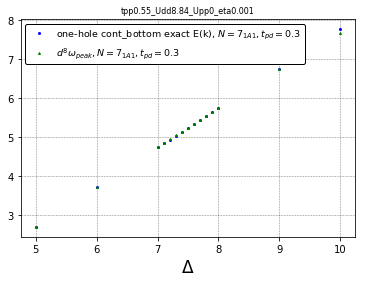

In [1]:
# Supplemental program for 1A1_lowest_peak_dispersion.ipynb
# to compare the Aw and w position for the lowest peak in 1A1 channel
# for 3-, 7-orbital models

%pylab inline

import math
import numpy as np
from scipy.sparse.linalg import inv
#from numpy.linalg import inv
import scipy.sparse as sps
import scipy.sparse.linalg
import sys
import matplotlib.pyplot as plt
sys.path.append('../../src/')
from pylab import *

########################################################################################
# first plot lowest peak and d9L continuum bottom separately to see if any discontinuity
########################################################################################
ed = 0
tpds = [0.3]
tpp = 0.55

pds = 1.5
pdp = 0.7
#pds = 0.00001
#pdp = 0.00001
pps = 1.0
ppp = 0.3

Npts = 9

A = 6.5
B = 0.15
C = 0.58
Udd = A+4*B+3*C
Upp = 0
eta = 0.001

titlename = 'tpp'+str(tpp)+'_Udd'+str(Udd)+'_Upp'+str(Upp)+'_eta'+str(eta)
    
##########################################################################
# E of lowest peak
##########################################################################
Ms = ['bo','rs','g^','m<','cp','k>','yv','--b','--r','--g','--m','--c','--k','--y']
# a[1,0]-tpp*4 is the bottom of p-band
# when (a[:,0]-tpp*4)-a[:,2] less than 0, peak within continuum; larger than 0, discrete state
ii = 0
for tpd in tpds:
    f1A1 = 'Norb3_tpd'+str(tpd)+'_tpp'+str(tpp)+'_Udd'+str(Udd)+'_Upp'+str(Upp) \
           +'_Mc30_eta'+str(eta)+'_1A1.txt'
    a = loadtxt('./Norb3/data_lowpeak/'+f1A1,skiprows=0)
    print 'lowest peak Delta:'
    print a[:,0]

    # continuum bottom via one-hole calculation with exact min(E(k)):
    b = loadtxt('./Norb3/one_hole_continuum_bottom/E_imp_Norb3_tpd'+str(tpd)+'_tpp0.55_Mc30.txt',skiprows=0)
    print 'one-hole continuum bottom with exact min(Ek) Delta:'
    print b[:,0]
    ab = a[:,0]-4.*tpp+b[:,2]
    # continuum bottom via two-hole calculation with A=50, B=C=0:
    #b = loadtxt('./data_lowpeak/Aw_Cu_dx2y2_O_Norb7_tpd'+str(tpd) \
    #            +'_tpp0.55_A50_B0_C0_Upp0_Mc32_eta0.001.txt',skiprows=0)
    #print 'two-hole continuum bottom Delta:'
    #print b[:,0]
    #assert(max(abs(a[:,0]-b[:,0]))<1.e-3)
    
    # debug: 
    #print 'Delta,  wpeak,  d9L,  dw'
    #for i in range(0,len(b)):
    #    print a[i,0], a[i,2], ab[i], ab[i]-a[i,2]
       
    plot(b[:,0], ab, Ms[ii], Markersize=2, label="one-hole cont_bottom exact E(k), $N=7_{1A1}, t_{pd}=$"+str(tpd))
    #plot(b[:,0], b[:,2], Ms[ii+1], Markersize=2, label="two-hole cont_bottom, $N=7_{1A1}, t_{pd}=$"+str(tpd))
    plot(a[:,0], a[:,2], Ms[ii+2], Markersize=2, label="$d^8 \omega_{peak}, N=7_{1A1}, t_{pd}=$"+str(tpd))
    ii += 1

title(titlename, fontsize=8)
xlabel('$t_{pd}$',fontsize=17)
xlabel('$\Delta$',fontsize=17)
#ylabel('$\omega(peak)$',fontsize=17)
#xlim([-4,-3])
#ylim([-13,-9])
#text(0.45, 0.1, '(a)', fontsize=16)
grid('on',linestyle="--", linewidth=0.5, color='black', alpha=0.5)
legend(loc='best', fontsize=9.5, framealpha=1.0, edgecolor='black')
savefig("wpeak_d9L_bottom_"+titlename+"_1A1.pdf")

tpd =  0.1


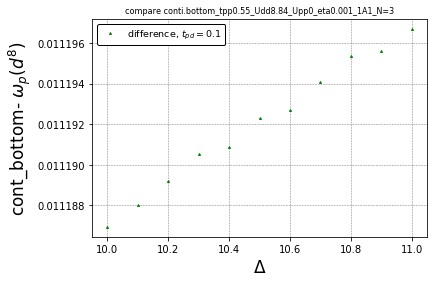

In [2]:
##########################################################################
# compare bottom of d9L continuum from different methods 1A1
##########################################################################
ed = 0
#tpds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
tpds = [0.1]
tpp = 0.55

pds = 1.5
pdp = 0.7
#pds = 0.00001
#pdp = 0.00001
pps = 1.0
ppp = 0.3

A = 6.5
B = 0.15
C = 0.58
Udd = A+4*B+3*C
Upp = 0
eta = 0.001

titlename = 'tpp'+str(tpp)+'_Udd'+str(Udd)+'_Upp'+str(Upp)+'_eta'+str(eta)

Ms = ['bo','rs','g^','m<','cp','k>','yv','--b','--r','--g','--m','--c','--k','--y']

ii = 0
for tpd in tpds:
    print 'tpd = ', tpd
    
    # continuum bottom via one-hole calculation with exact min(E(k)):
    b = loadtxt('./Norb3/one_hole_continuum_bottom/E_imp_Norb3_tpd'+str(tpd)+'_tpp0.55_Mc30.txt',skiprows=0)
    a = b[:,0]-4.*tpp+b[:,2]
    #plot(b[:,0], a, Ms[ii], Markersize=2, label="one-hole, $t_{pd}=$"+str(tpd))
    
    # continuum bottom via lowest peak of two-hole calculation with A=100, B=C=0:
    #b = loadtxt('./data_lowpeak/Aw_Cu_dx2y2_O_Norb7_tpd'+str(tpd) \
    #            +'_tpp0.55_A50_B0_C0_Upp0_Mc32_eta0.001.txt',skiprows=0)  
    #a = b[:,2]
    #plot(b[:,0], a, Ms[ii+1], Markersize=2, label="two-hole lowest peak, $t_{pd}=$"+str(tpd))
    
    # continuum bottom via G.S. energy of two-hole calculation with Udd=100 with only (up,dn) states:
    b = loadtxt('./Norb3/data_GS_as_continuum_bottom/Egs_Norb3_tpd'+str(tpd) \
                +'_tpp0.55_Udd100_Upp0_Mc30_eta0.001.txt',skiprows=0) 
    c = b[:,2]
    #plot(b[:,0], c, Ms[ii+1], Markersize=2, label="two-hole Egs, $t_{pd}=$"+str(tpd))
    
    plot(b[:,0], c-a, Ms[ii+2], Markersize=2, label="difference, $t_{pd}=$"+str(tpd))

title('compare conti.bottom_'+titlename+'_1A1_N=3', fontsize=8)
xlabel('$t_{pd}$',fontsize=17)
xlabel('$\Delta$',fontsize=17)
ylabel('cont_bottom- $\omega_p(d^8)$',fontsize=17)
#xlim([0,1])
#ylim([0,0.5])
#text(0.45, 0.1, '(a)', fontsize=16)
grid('on',linestyle="--", linewidth=0.5, color='black', alpha=0.5)
legend(loc='best', fontsize=9.5, framealpha=1.0, edgecolor='black')
savefig("compare conti_bottom_"+titlename+".pdf")

tpd =  0.6
lowest peak Delta:
[-10.201 -10.002  -9.804  -9.605  -9.406  -9.208  -9.009  -8.811  -8.613
  -8.415  -8.218  -8.02   -7.823  -7.626  -7.43   -7.234  -7.038]
Delta,  cont_bottom-d8 peak
-2.9 -0.0002300000000001745
-2.8 -0.0002899999999996794
-2.7 0.0005540000000010536
-2.6 0.0003060000000001395
-2.5 -4.8999999998855515e-05
-2.4 0.0004779999999993123
-2.3 -0.00012699999999910005
-2.2 0.00012100000000003774
-2.1 0.0002049999999993446
-2.0 0.00010499999999957765
-1.9 0.0008009999999991635
-1.8 0.0002689999999994086
-1.7 0.00048000000000048004
-1.6 0.00040599999999990644
-1.5 0.0010119999999993468
-1.4 0.001262999999999792
-1.3 0.0011169999999998126
-2.9


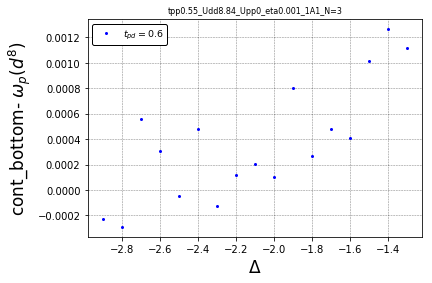

In [13]:
##########################################################################
# bottom of d9L continuum - d8_lowpeak for 1A1
##########################################################################
ed = 0
tpds = [0.35,0.4,0.5,0.6]
tpds = [0.6]
tpp = 0.55

pds = 1.5
pdp = 0.7
#pds = 0.00001
#pdp = 0.00001
pps = 1.0
ppp = 0.3

A = 6.5
B = 0.15
C = 0.58
Udd = A+4*B+3*C
Upp = 0
eta = 0.001

titlename = 'tpp'+str(tpp)+'_Udd'+str(Udd)+'_Upp'+str(Upp)+'_eta'+str(eta)

Ms = ['bo','rs','g^','m<','cp','k>','yv','bh','--r','--g','--m','--c','--k','--y']
# a[1,0]-tpp*4 is the bottom of p-band
# when (a[:,0]-tpp*4)-a[:,2] less than 0, peak within continuum; larger than 0, discrete state
ii = 0
for tpd in tpds:
    print 'tpd = ', tpd
    
    f1A1 = 'Norb3_tpd'+str(tpd)+'_tpp'+str(tpp)+'_Udd'+str(Udd)+'_Upp'+str(Upp) \
           +'_Mc30_eta'+str(eta)+'_1A1.txt'
    a = loadtxt('./Norb3/data_lowpeak/'+f1A1,skiprows=0)
    print 'lowest peak Delta:'
    print a[:,2]

    # continuum bottom via one-hole calculation with exact min(E(k)):
    #b = loadtxt('./Norb3/one_hole_continuum_bottom/E_imp_Norb3_tpd'+str(tpd)+'_tpp0.55_Mc30.txt',skiprows=0)
    #print 'one-hole continuum bottom with exact min(Ek) Delta:'
    #print a[:,0]-4.*tpp+b[:,2]
    #ab = a[:,0]-4.*tpp+b[:,2]-a[:,2]

    # continuum bottom via G.S. energy of two-hole calculation with Udd=100 with only (up,dn) states:
    b = loadtxt('./Norb3/data_GS_as_continuum_bottom/Egs_Norb3_tpd'+str(tpd) \
                +'_tpp0.55_Udd100_Upp0_Mc30_eta0.001.txt',skiprows=0) 
    #print 'two-hole continuum bottom:'
    #print b[:,2]
    ab = b[:,2]-a[:,2]
    
    # debug:
    print 'Delta,  cont_bottom-d8 peak'
    for i in range(0,len(a)):
        print a[i,0],ab[i]
    
    idx = find(ab>-0.2)
    plot(a[idx,0], ab[idx], Ms[ii], Markersize=2, label="$t_{pd}=$"+str(tpd))
    #plot(a[:,0], ab, Ms[ii], Markersize=2, label="$t_{pd}=$"+str(tpd))
    ii += 1
    print min(a[:,0])
    
    # find critical Delta
    '''
    idx = find(ab>0.)
    ab_min = min(ab[idx])
    id_min = find(ab==ab_min)
    print 'min positive d9L-wpeak = ', ab_min, 'at Delta = ', a[id_min,0]
    idx = find(ab<0.)
    ab_max = max(ab[idx])
    id_max = find(ab==ab_max)
    print 'max negative d9L-wpeak = ', ab_max, 'at Delta = ', a[id_max,0]
    '''

title(titlename+'_1A1_N=3', fontsize=8)
xlabel('$t_{pd}$',fontsize=17)
xlabel('$\Delta$',fontsize=17)
ylabel('cont_bottom- $\omega_p(d^8)$',fontsize=17)
#xlim([0,1])
#ylim([0,0.5])
#text(0.45, 0.1, '(a)', fontsize=16)
grid('on',linestyle="--", linewidth=0.5, color='black', alpha=0.5)
legend(loc='best', fontsize=9.5, framealpha=1.0, edgecolor='black')
savefig("dw_lowpeak_"+titlename+"_1A1.pdf")